# CHIPS-CVN Evaluation

In [1]:
# The configuration yaml file must be specified
config_file = "./config/evaluate.yml"

In [2]:
# Import all the required modules and call the gpu_setup utility
import time
from array import array

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import ROOT
from root_numpy import fill_hist

import chipscvn.utils as utils
import chipscvn.config as config
import chipscvn.data as data
import chipscvn.models as models
import chipscvn.evaluators as evaluators
utils.gpu_setup()  # Setup the GPU's
ROOT.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.18/04
---  4 Physical GPUs, 4 Logical GPUs ---


In [3]:
# Load the trained models from the configuration and run the evaluator
conf = config.get(config_file)
evaluator = utils.get_evaluator(conf)
evaluator.run()

--- Running Evaluation ---

--- running inference...

--- parsing outputs...

--- calculating weights...

Total-> Nuel: 17665, Numu: 18045, Cosmic: 15554

Weights-> Nuel:0.0045, Numu:0.1889, Cosmic:77.8383

--- calculating cuts...

--- Done (took 166.92806839942932 seconds) ---

2020-03-19 15:43:25.423731: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-03-19 15:43:25.726296: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7


## Cut Evaluation

First we evaluate how well the cuts remove background events...

In [4]:
# Plot the 'r_raw_total_digi_q' which we cut on
y_max = 0.13
hists, leg = evaluator.combined_cat_plot('r_raw_total_digi_q', 40, 0, 5000, 0, y_max, 'norm', False, False)
c = ROOT.TCanvas("r_raw_total_digi_q", 'r_raw_total_digi_q', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()

cut_line = ROOT.TLine(conf.eval.cuts.q, 0, conf.eval.cuts.q, y_max)
cut_line.SetLineWidth(3)
cut_line.SetLineColor(14)
cut_line.Draw()

cut_box = ROOT.TBox(0, 0, conf.eval.cuts.q, y_max)
cut_box.SetFillColor(14)
cut_box.SetFillStyle(3345)
cut_box.Draw()

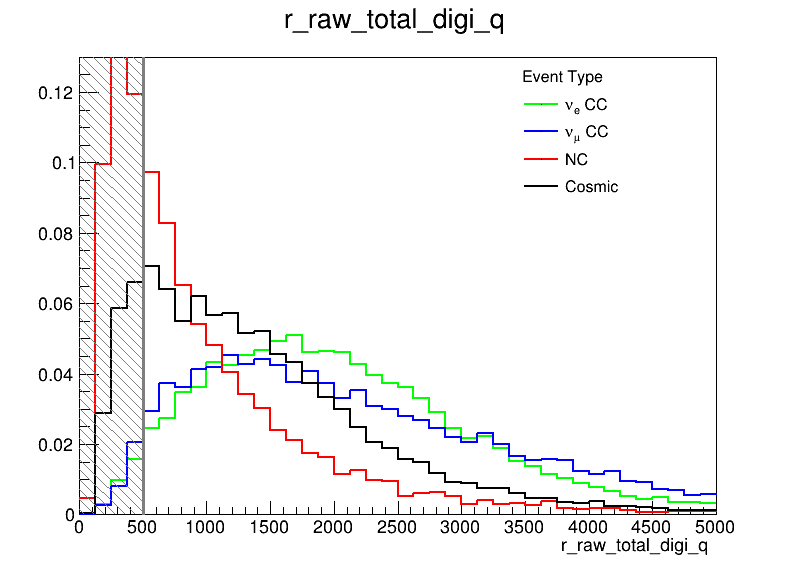

In [5]:
c.Draw()

In [6]:
# Plot the 'r_first_ring_height' which we cut on
y_max = 0.15
hists, leg = evaluator.combined_cat_plot('r_first_ring_height', 40, 0, 5000, 0, y_max, 'norm', False, False)
c = ROOT.TCanvas("r_first_ring_height", 'r_first_ring_height', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()

cut_line = ROOT.TLine(conf.eval.cuts.hough, 0, conf.eval.cuts.hough, y_max)
cut_line.SetLineWidth(3)
cut_line.SetLineColor(14)
cut_line.Draw()

cut_box = ROOT.TBox(0, 0, conf.eval.cuts.hough, y_max)
cut_box.SetFillColor(14)
cut_box.SetFillStyle(3345)
cut_box.Draw()

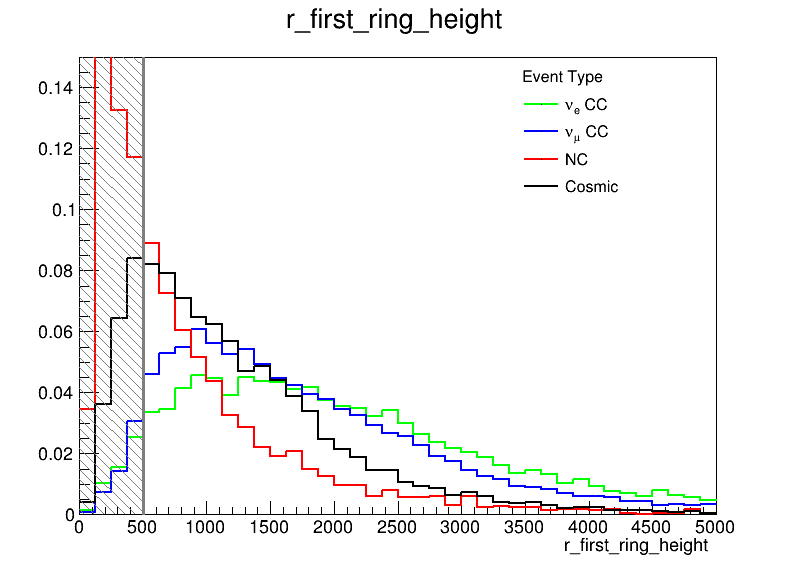

In [7]:
c.Draw()

In [8]:
# Plot the 'r_dirTheta' which we cut on
y_max = 0.25
hists, leg = evaluator.combined_cat_plot('r_dirTheta', 64, -1, 1, 0, y_max, 'norm', False, False)
c = ROOT.TCanvas("r_dirTheta", 'r_dirTheta', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()

cut_line_low = ROOT.TLine(-conf.eval.cuts.theta, 0, -conf.eval.cuts.theta, y_max)
cut_line_low.SetLineWidth(3)
cut_line_low.SetLineColor(14)
cut_line_low.Draw()
cut_box_low = ROOT.TBox(-1, 0, -conf.eval.cuts.theta, y_max)
cut_box_low.SetFillColor(14)
cut_box_low.SetFillStyle(3345)
cut_box_low.Draw()

cut_line_high = ROOT.TLine(conf.eval.cuts.theta, 0, conf.eval.cuts.theta, y_max)
cut_line_high.SetLineWidth(3)
cut_line_high.SetLineColor(14)
cut_line_high.Draw()
cut_box_high = ROOT.TBox(conf.eval.cuts.theta, 0, 1, y_max)
cut_box_high.SetFillColor(14)
cut_box_high.SetFillStyle(3345)
cut_box_high.Draw()

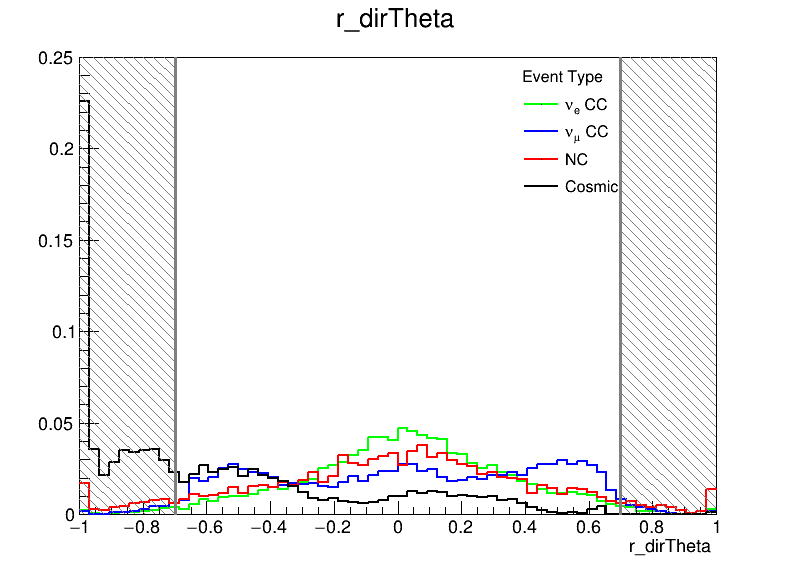

In [9]:
c.Draw()

In [10]:
# Plot the 'r_dirPhi' which we cut on
y_max = 0.18
hists, leg = evaluator.combined_cat_plot('r_dirPhi', 64, -1, 1, 0, y_max, 'norm', False, False)
c = ROOT.TCanvas("r_dirPhi", 'r_dirPhi', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()

cut_line_low = ROOT.TLine(-conf.eval.cuts.phi, 0, -conf.eval.cuts.phi, y_max)
cut_line_low.SetLineWidth(3)
cut_line_low.SetLineColor(14)
cut_line_low.Draw()
cut_box_low = ROOT.TBox(-1, 0, -conf.eval.cuts.phi, y_max)
cut_box_low.SetFillColor(14)
cut_box_low.SetFillStyle(3345)
cut_box_low.Draw()

cut_line_high = ROOT.TLine(conf.eval.cuts.phi, 0, conf.eval.cuts.phi, y_max)
cut_line_high.SetLineWidth(3)
cut_line_high.SetLineColor(14)
cut_line_high.Draw()
cut_box_high = ROOT.TBox(conf.eval.cuts.phi, 0, 1, y_max)
cut_box_high.SetFillColor(14)
cut_box_high.SetFillStyle(3345)
cut_box_high.Draw()

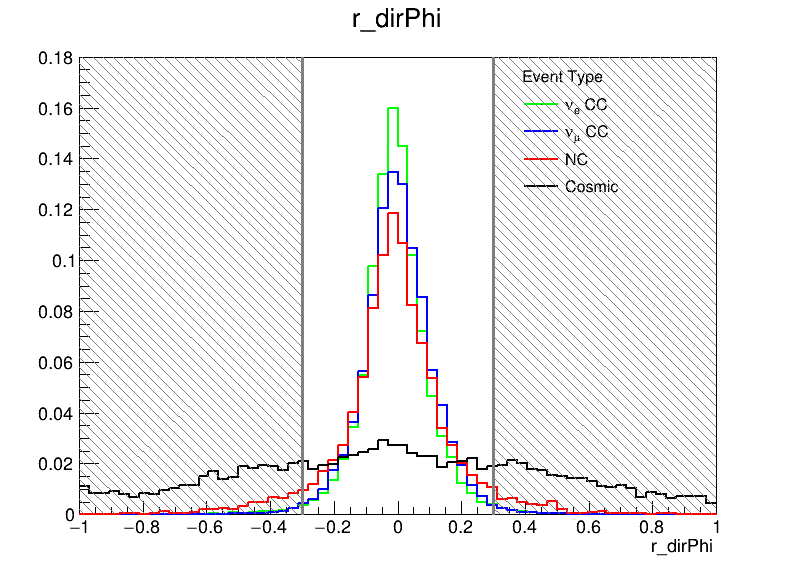

In [11]:
c.Draw()

In [12]:
# Print how these cuts affect the different categories
evaluator.base_cut_summary()

Base Cut Summary...

Nuel-CC-> Total 14996, Survived: 0.9137103227527341

Numu-CC-> Total 14970, Survived: 0.8953239812959252

NC-> Total 5744, Survived: 0.5104456824512534

Cosmic-> Total 15554, Survived: 0.20515622990870516



## Cosmic Classifier Evaluation

Next we will evaluate how well the cosmic classifier performed...

In [13]:
# Plot the cosmic output which we cut on
hists, leg = evaluator.combined_cat_plot('c_out', 40, 0, 1, 0, 1.2, 'norm', True, False)
c = ROOT.TCanvas("c_out", 'c_out', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()

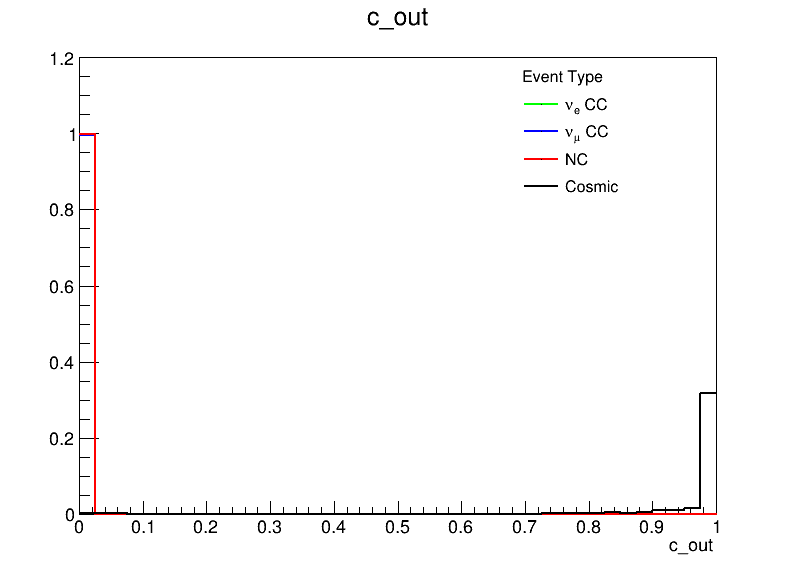

In [14]:
c.Draw()

In [15]:
# Print how this cut affects the different categories

print("Applying cut at cosmic output value: {}\n".format(conf.eval.cuts.cosmic))

evaluator.combined_cut_summary()

Applying cut at cosmic output value: 0.001

Base + Cosmic Cut Summary...

Nuel-CC-> Total 14996, Survived: 0.9055748199519872

Numu-CC-> Total 14970, Survived: 0.8760855043420174

NC-> Total 5744, Survived: 0.504700557103064

Cosmic-> Total 15554, Survived: 0.00019287643050019287



In [16]:
# Plot the true nuEnergy with base_cut and cosmic_cut
hists, leg = evaluator.combined_cat_plot('t_nuEnergy', 40, 0, 8000, 0, 0.09, 'norm', True, True)
c = ROOT.TCanvas("t_nuEnergy", 't_nuEnergy', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()

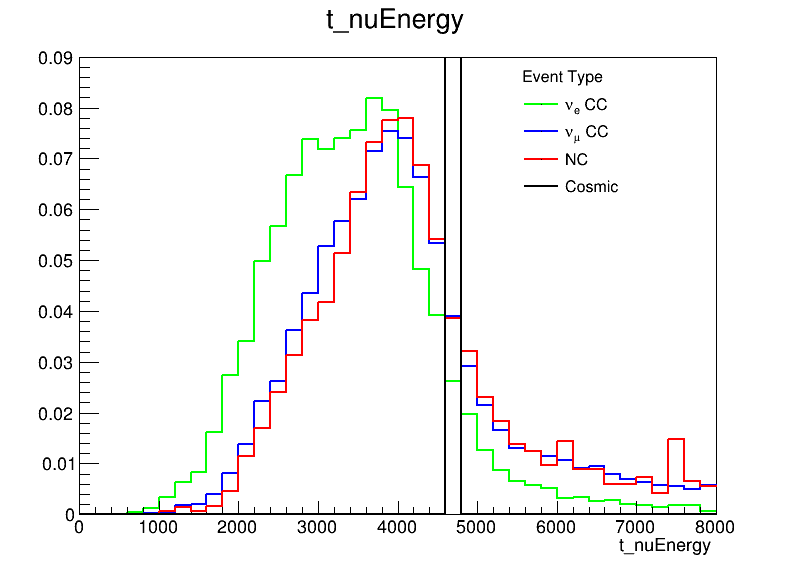

In [17]:
c.Draw()

## Beam Classifier Evaluation

Next we will evaluate how well the beam classifier performed...

In [18]:
# Plot the 'nuel_score' with the cuts applied and normalised per event type
hists, leg = evaluator.combined_cat_plot('nuel_score', 40, 0, 1, 0, 0.08, 'norm', True, True)
c = ROOT.TCanvas("nuel_score", 'nuel_score', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
#leg.Draw()

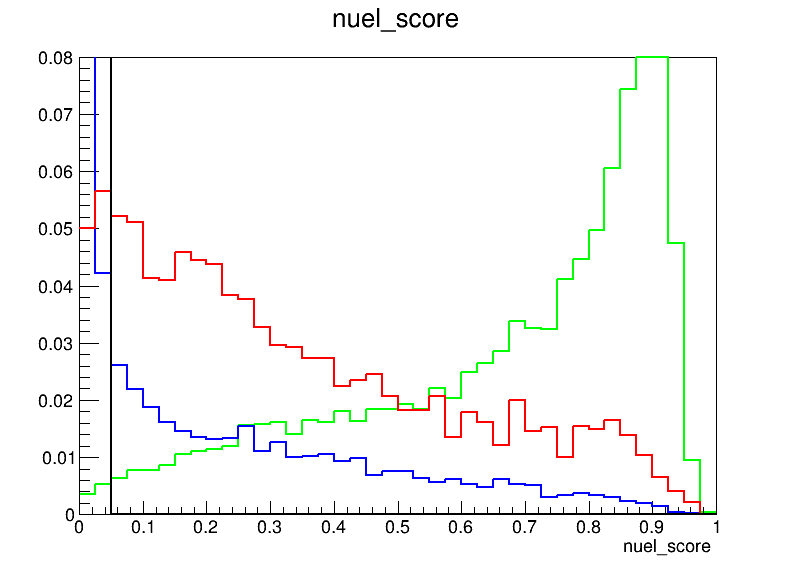

In [19]:
c.Draw()

In [20]:
# Plot the 'numu_score' with the cuts applied and normalised per event type
hists, leg = evaluator.combined_cat_plot('numu_score', 40, 0, 1, 0, 0.7, 'norm', True, True)
c = ROOT.TCanvas("numu_score", 'numu_score', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
#leg.Draw()

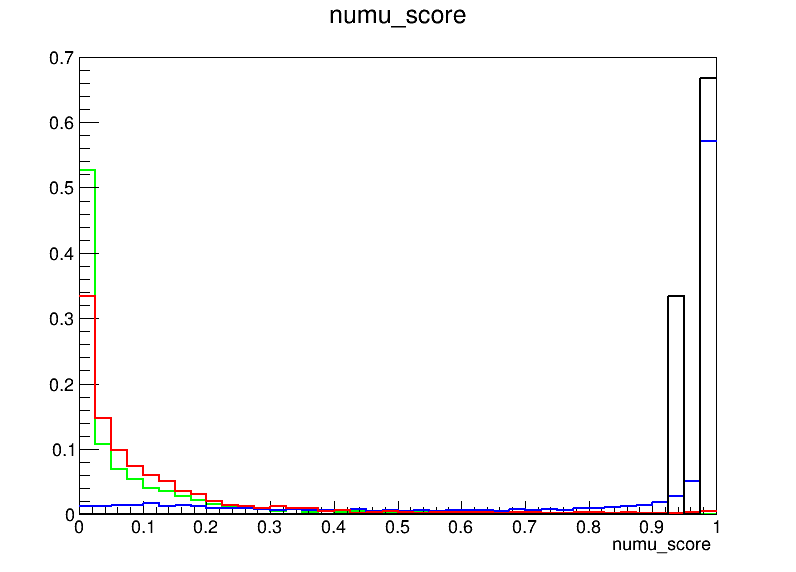

In [21]:
c.Draw()

In [22]:
# Plot the 'nc_score' with the cuts applied and normalised per event type
hists, leg = evaluator.combined_cat_plot('nc_score', 40, 0, 1, 0, 0.12, 'norm', True, True)
c = ROOT.TCanvas("nc_score", 'nc_score', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
#leg.Draw()

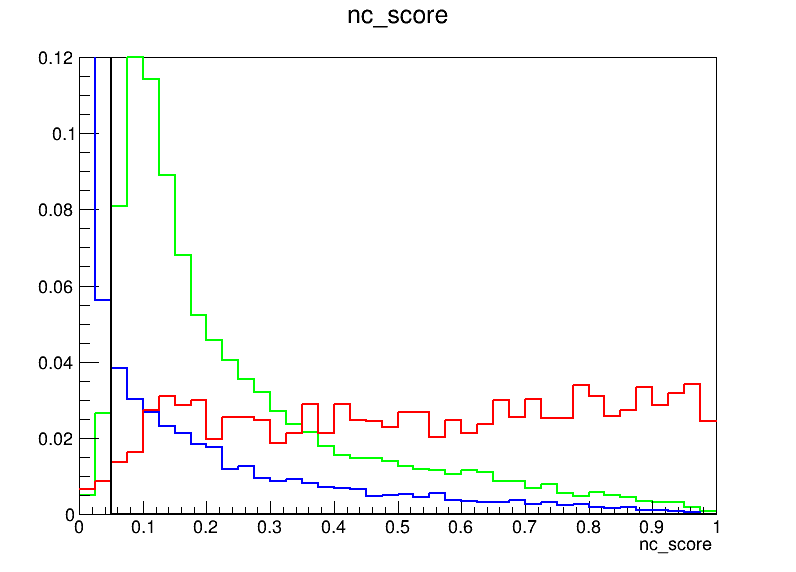

In [23]:
c.Draw()

In [24]:
# Run a scan on nuel_cc_combined cuts to find maximum efficiency*purity
eff_array = evaluator.events[(evaluator.events.base_cut == 0) & (evaluator.events.cosmic_cut == 0)]

nuelCCTot = eff_array[eff_array.t_full_cat == 0]['weight'].sum()
numuCCTot = eff_array[eff_array.t_full_cat == 1]['weight'].sum()
ncTot = eff_array[eff_array.t_full_cat == 2]['weight'].sum()
cosmicTot = eff_array[eff_array.t_full_cat == 3]['weight'].sum()
 
eff_sig, eff_bkg, pur, fom, cut = array('d'), array('d'), array('d'), array('d'), array('d')

bins = 100
maxFOM = 0.0
maxFomCut = 0

cut.append(0.0)
eff_sig.append(1.0)
eff_bkg.append(1.0)
pur.append(nuelCCTot/(nuelCCTot+numuCCTot+ncTot))
fom.append(eff_sig[0]*pur[0])

for bin in range(bins):
    cut.append((bin * 0.01) + 0.01)
    
    nuelCCCut = eff_array[(eff_array.t_full_cat == 0) & 
                          (eff_array.nuel_score > cut[bin])]['weight'].sum()
    
    numuCCCut = eff_array[(eff_array.t_full_cat == 1) & 
                          (eff_array.nuel_score > cut[bin])]['weight'].sum()
    
    ncCut = eff_array[(eff_array.t_full_cat == 2) & 
                      (eff_array.nuel_score > cut[bin])]['weight'].sum()
    
    cosmicCut = eff_array[(eff_array.t_full_cat == 3) & 
                          (eff_array.nuel_score > cut[bin])]['weight'].sum()
    

    eff_sig.append(nuelCCCut/nuelCCTot)
    #eff_bkg.append((numuCCCut+ncCut+cosmicCut)/(numuCCTot+ncTot+cosmicTot))
    #pur.append(nuelCCCut/(nuelCCCut+numuCCCut+ncCut+cosmicCut))
    eff_bkg.append((numuCCCut+ncCut)/(numuCCTot+ncTot))
    
    if eff_sig[bin+1] == 0.0 or eff_bkg[bin+1] == 0.0:
        pur.append(0.0)
        fom.append(0.0)
    else:
        pur.append(nuelCCCut/(nuelCCCut+numuCCCut+ncCut))
        fom.append(eff_sig[bin]*pur[bin])
    
    #print("Cut: {0:.4f}, Sig Eff:{1:.4f}, Bkg Eff: {2:.4f}, Pur: {3:.4f}, Fom: {4:.4f}".format(cut[bin+1], eff_sig[bin+1], eff_bkg[bin+1], pur[bin+1], fom[bin+1]))

    if fom[bin] > maxFOM: 
        maxFOM = fom[bin] 
        maxFomCut = cut[bin]

In [25]:
eff_sig_gr = ROOT.TGraph(bins+1, cut, eff_sig)
eff_bkg_gr = ROOT.TGraph(bins+1, cut, eff_bkg)
pur_gr = ROOT.TGraph(bins+1, cut, pur)
fom_gr = ROOT.TGraph(bins+1, cut, fom)
eff_vs_bkg = ROOT.TGraph(bins+1, eff_bkg, eff_sig)

c = ROOT.TCanvas("c", "", 800, 600)
c.cd()

eff_sig_gr.SetLineColor(ROOT.kGreen)     
eff_sig_gr.SetLineWidth(2)
eff_sig_gr.SetMarkerColor(ROOT.kGreen)
eff_sig_gr.SetTitle("Scan across nuel_score cut")
eff_sig_gr.GetXaxis().SetTitle('nuel_score cut')
eff_sig_gr.GetXaxis().SetRangeUser(0, 1)
eff_sig_gr.GetYaxis().SetRangeUser(0, 1)
eff_sig_gr.Draw("sameALP")

eff_bkg_gr.SetLineColor(ROOT.kBlue)     
eff_bkg_gr.SetLineWidth(2)
eff_bkg_gr.SetMarkerColor(ROOT.kBlue)
eff_bkg_gr.Draw("sameLP")

pur_gr.SetLineColor(ROOT.kRed)     
pur_gr.SetLineWidth(2)
pur_gr.SetMarkerColor(ROOT.kRed)
pur_gr.Draw("sameLP")

fom_gr.SetLineColor(ROOT.kBlack)     
fom_gr.SetLineWidth(2)
fom_gr.SetMarkerColor(ROOT.kBlack)
fom_gr.Draw("sameLP")

eff_vs_bkg.SetLineColor(ROOT.kYellow)     
eff_vs_bkg.SetLineWidth(2)
eff_vs_bkg.SetMarkerColor(ROOT.kYellow)
eff_vs_bkg.Draw("sameLP")

leg = ROOT.TLegend(0.65, 0.65, 0.85, 0.85)
leg.AddEntry(eff_sig_gr, "Sig Eff", "LP")
leg.AddEntry(eff_bkg_gr, "Bkg Eff", "LP")
leg.AddEntry(pur_gr, "Sig Purity", "LP")
leg.AddEntry(fom_gr, "FOM", "LP")
leg.AddEntry(eff_vs_bkg, "Sig vs Bkg", "LP")
leg.SetTextSize(0.03)
leg.SetTextFont(42)
leg.SetFillColor(42)
leg.SetFillStyle(1001)
leg.Draw()

c.SetGridx()
c.SetGridy()
c.Update()

Max Figure-of-merit: 0.13289149126468763, at cut value: 0.75


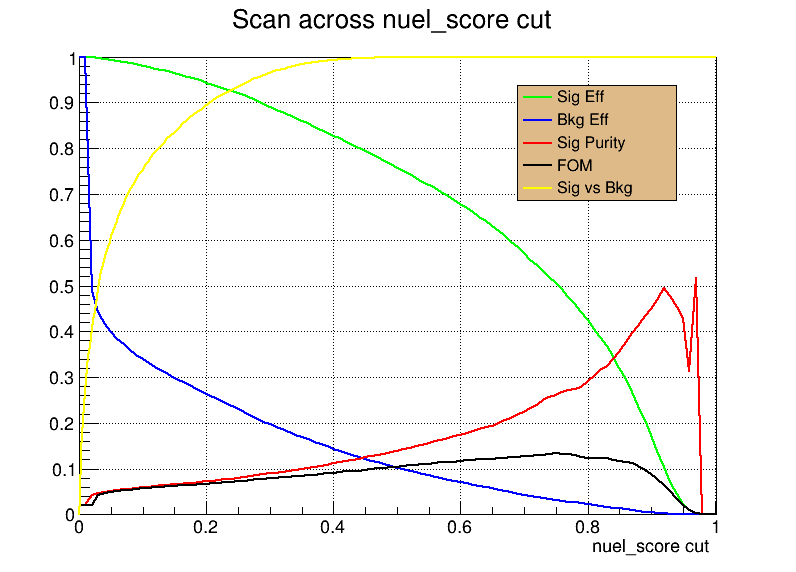

In [26]:
c.Draw()
print("Max Figure-of-merit: {}, at cut value: {}".format(maxFOM, maxFomCut))

In [27]:
# Generate efficiency and purity histograms using the maximised FOM
nuelCCAll = eff_array[eff_array.t_full_cat == 0]
nuelCCSel = eff_array[(eff_array.t_full_cat == 0) & (eff_array.base_cut == 0) & (eff_array.cosmic_cut == 0) & (eff_array.nuel_score > maxFomCut)]
nuelCCAll_h = ROOT.TH1F("nuelCCAll", "", 8, 1000, 5000)
nuelCCSel_h = ROOT.TH1F("nuelCCSel", "", 8, 1000, 5000)
nuelCCAll_h.Sumw2()
nuelCCSel_h.Sumw2()
fill_hist(nuelCCAll_h, nuelCCAll['t_nuEnergy'].to_numpy(), nuelCCAll['weight'].to_numpy())
fill_hist(nuelCCSel_h, nuelCCSel['t_nuEnergy'].to_numpy(), nuelCCSel['weight'].to_numpy())
nuelCCEff = ROOT.TGraphAsymmErrors(nuelCCSel_h, nuelCCAll_h, "n")

numuCCAll = eff_array[eff_array.t_full_cat == 1]
numuCCSel = eff_array[(eff_array.t_full_cat == 1) & (eff_array.base_cut == 0) & (eff_array.cosmic_cut == 0) & (eff_array.nuel_score > maxFomCut)]
numuCCAll_h = ROOT.TH1F("numuCCAll", "", 8, 1000, 5000)
numuCCSel_h = ROOT.TH1F("numuCCSel", "", 8, 1000, 5000)
numuCCAll_h.Sumw2()
numuCCSel_h.Sumw2()
fill_hist(numuCCAll_h, numuCCAll['t_nuEnergy'].to_numpy(), numuCCAll['weight'].to_numpy())
fill_hist(numuCCSel_h, numuCCSel['t_nuEnergy'].to_numpy(), numuCCSel['weight'].to_numpy())
numuCCEff = ROOT.TGraphAsymmErrors(numuCCSel_h, numuCCAll_h, "n")

ncAll = eff_array[eff_array.t_full_cat == 2]
ncSel = eff_array[(eff_array.t_full_cat == 2) & (eff_array.base_cut == 0) & (eff_array.cosmic_cut == 0) & (eff_array.nuel_score > maxFomCut)]
ncAll_h = ROOT.TH1F("ncAll", "", 8, 1000, 5000)
ncSel_h = ROOT.TH1F("ncSel", "", 8, 1000, 5000)
ncAll_h.Sumw2()
ncSel_h.Sumw2()
fill_hist(ncAll_h, ncAll['t_nuEnergy'].to_numpy(), ncAll['weight'].to_numpy())
fill_hist(ncSel_h, ncSel['t_nuEnergy'].to_numpy(), ncSel['weight'].to_numpy())
ncEff = ROOT.TGraphAsymmErrors(ncSel_h, ncAll_h, "n")

cosmicAll = eff_array[eff_array.t_full_cat == 3]
cosmicSel = eff_array[(eff_array.t_full_cat == 3) & (eff_array.base_cut == 0) & (eff_array.cosmic_cut == 0) & (eff_array.nuel_score > maxFomCut)]
cosmicAll_h = ROOT.TH1F("cosmicAll", "", 8, 1000, 5000)
cosmicSel_h = ROOT.TH1F("cosmicSel", "", 8, 1000, 5000)
cosmicAll_h.Sumw2()
cosmicSel_h.Sumw2()
fill_hist(cosmicAll_h, cosmicAll['t_nuEnergy'].to_numpy(), cosmicAll['weight'].to_numpy())
fill_hist(cosmicSel_h, cosmicSel['t_nuEnergy'].to_numpy(), cosmicSel['weight'].to_numpy())
cosmicEff = ROOT.TGraphAsymmErrors(cosmicSel_h, cosmicAll_h, "n")

signal = eff_array[(eff_array.t_full_cat == 0) & (eff_array.base_cut == 0) & (eff_array.cosmic_cut == 0) & (eff_array.nuel_score > maxFomCut)]
total = eff_array[(eff_array.base_cut == 0) & (eff_array.cosmic_cut == 0) & (eff_array.nuel_score > maxFomCut)]
signal_h = ROOT.TH1F("signal", "", 8, 1000, 5000)
total_h = ROOT.TH1F("total", "", 8, 1000, 5000)
signal_h.Sumw2()
total_h.Sumw2()
fill_hist(signal_h, signal['t_nuEnergy'].to_numpy(), signal['weight'].to_numpy())
fill_hist(total_h, total['t_nuEnergy'].to_numpy(), total['weight'].to_numpy())
purity = ROOT.TGraphAsymmErrors(signal_h, total_h, "n")

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 7 points have been skipped


In [28]:
# Make a efficiency and purity plot as a function of neutrino energy
eff_c = ROOT.TCanvas("eff_c", "", 800, 600)
eff_c.cd()

hempty = ROOT.TH2F("hempty", ";Neutrino Energy (MeV); Efficiency or Purity", 1, 1000, 5000, 10, 0, 1)
hempty.GetXaxis().SetTitleSize(0.06)  
hempty.GetYaxis().SetTitleSize(0.06) 
hempty.GetXaxis().CenterTitle()
hempty.GetXaxis().SetTitleOffset(0.8)  
hempty.GetYaxis().SetTitleOffset(0.8) 
hempty.GetYaxis().CenterTitle()
hempty.GetXaxis().SetLabelSize(0.05)    
hempty.GetYaxis().SetLabelSize(0.05)
hempty.Draw()

nuelCCEff.SetLineColor(ROOT.kGreen)     
nuelCCEff.SetLineWidth(2)
nuelCCEff.SetMarkerSize(1.2)    
nuelCCEff.SetMarkerStyle(20)
nuelCCEff.SetMarkerColor(ROOT.kGreen)
nuelCCEff.Draw("sameP")

numuCCEff.SetLineColor(ROOT.kBlue)     
numuCCEff.SetLineWidth(2)
numuCCEff.SetMarkerSize(1.2)    
numuCCEff.SetMarkerStyle(20)
numuCCEff.SetMarkerColor(ROOT.kBlue)
numuCCEff.Draw("sameP")

ncEff.SetLineColor(ROOT.kRed)     
ncEff.SetLineWidth(2)
ncEff.SetMarkerSize(1.2)    
ncEff.SetMarkerStyle(20)
ncEff.SetMarkerColor(ROOT.kRed)
ncEff.Draw("sameP")

cosmicEff.SetLineColor(ROOT.kBlack)     
cosmicEff.SetLineWidth(2)
cosmicEff.SetMarkerSize(1.2)    
cosmicEff.SetMarkerStyle(20)
cosmicEff.SetMarkerColor(ROOT.kBlack)
cosmicEff.Draw("sameP")

purity.SetLineColor(ROOT.kYellow)     
purity.SetLineWidth(2)
purity.SetMarkerSize(1.2)    
purity.SetMarkerStyle(20)
purity.SetMarkerColor(ROOT.kYellow)
purity.Draw("sameP")

leg = ROOT.TLegend(0.15, 0.65, 0.35, 0.85)
leg.AddEntry(nuelCCEff, "#nu_{e} CC Eff", "P")
leg.AddEntry(numuCCEff, "#nu_{#mu} CC Eff", "P")
leg.AddEntry(ncEff, "NC Eff", "P")
leg.AddEntry(cosmicEff, "Cosmic Eff", "P")
leg.AddEntry(purity, "#nu_{e} CC Purity", "P")
leg.SetTextSize(0.03)
leg.SetTextFont(42)
leg.SetFillColor(42)
leg.SetFillStyle(1001)
leg.Draw()
eff_c.Update()

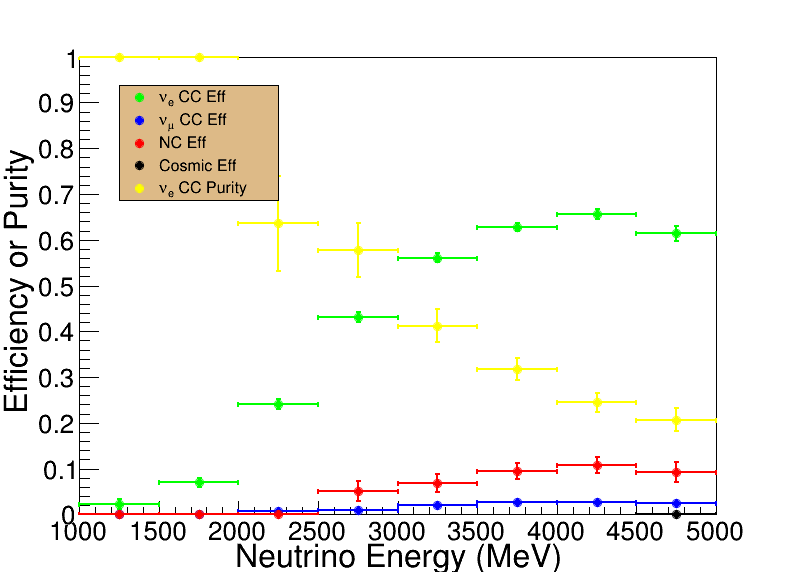

In [29]:
eff_c.Draw()

In [30]:
# Plot a confusion matrix for events that pass the cut
def pred_classifier(event):
    if event['cosmic_cut'] == True:
        return 3
    else:  
        combined_values = [event['nuel_score'], event['numu_score'], event['nc_score']]
        return np.asarray(combined_values).argmax()
    
selection = evaluator.events[evaluator.events.base_cut == False]
selection['pred_cat_combined'] = selection.apply(pred_classifier, axis=1)

matrix_true = confusion_matrix(selection["t_full_cat"], selection["pred_cat_combined"], normalize='true')
matrix_true_transpose = np.rot90(matrix_true, 1)
true_cm = pd.DataFrame(matrix_true_transpose, index = ["COSMIC", "NC", "MU-CC", "EL-CC"], columns = ["EL-CC", "MU-CC", "NC", "COSMIC"])

matrix_pred = confusion_matrix(selection["t_full_cat"], selection["pred_cat_combined"], normalize='pred')
matrix_pred_transpose = np.rot90(matrix_pred, 1)
pred_cm = pd.DataFrame(matrix_pred_transpose, index = ["COSMIC", "NC", "MU-CC", "EL-CC"], columns = ["EL-CC", "MU-CC", "NC", "COSMIC"])

Text(123.0, 0.5, 'Predicted')

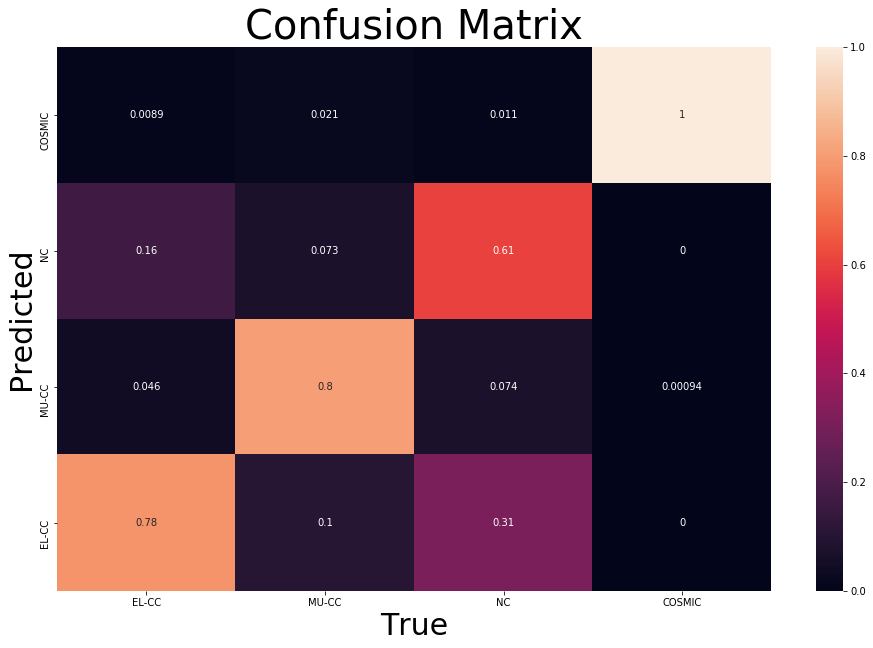

In [31]:
plt.figure(figsize=(16,10))
sns.heatmap(true_cm, annot=True, vmin=0.0, vmax=1.0)
plt.title('Confusion Matrix', fontsize = 40) # title with fontsize 20
plt.xlabel('True', fontsize = 30) # x-axis label with fontsize 15
plt.ylabel('Predicted', fontsize = 30) # y-axis label with fontsize 15

In [32]:
# Print a Sklearn classification report
axis_labels = ["EL-CC", "MU-CC", "NC", "COSMIC"]
print(classification_report(selection["t_full_cat"], selection["pred_cat_combined"], target_names=axis_labels))

precision    recall  f1-score   support

       EL-CC       0.82      0.78      0.80     13702
       MU-CC       0.93      0.80      0.86     13403
          NC       0.36      0.61      0.45      2932
      COSMIC       0.88      1.00      0.93      3191

    accuracy                           0.80     33228
   macro avg       0.75      0.80      0.76     33228
weighted avg       0.83      0.80      0.81     33228

